# Exploratory Data Analysis of Synthea MCODE Breast Cancer Dataset
This notebook gives a simple exploratory data analysis of the described Synthea dataset. The notebook assumes that you have a local instance of Katsu running on the default port with Synthea data ingested (as outlined in the federated-learning repository's README.md).

No algorithm is trained over this data here, but the preprocessing techniques are similar to those used for training a model.

We use pandas to perform data cleaning and heatmap creation. 

In [5]:
import requests
import math
data_raw = requests.get("http://localhost:8000/api/mcodepackets") # call to localhost Katsu
count = data_raw.json()['count'] # get total number of available MCODE packets in Katsu
print(count)

2052


In [7]:
pages = math.ceil(count/25) # We restrict the number of entries per call to 25.

all_results = []
for i in range(pages): # this is a slightly time consuming process, expect it to take ~4-5 minutes for fetching
    data_raw = requests.get("http://localhost:8000/api/mcodepackets?page=" + str(i+1))
    results_json = data_raw.json()['results']
    all_results += results_json
    print("added page " + str(i+1))

print(len(all_results))

added page 0
added page 1
added page 2
added page 3
added page 4
added page 5
added page 6
added page 7
added page 8
added page 9
added page 10
added page 11
added page 12
added page 13
added page 14
added page 15
added page 16
added page 17
added page 18
added page 19
added page 20
added page 21
added page 22
added page 23
added page 24
added page 25
added page 26
added page 27
added page 28
added page 29
added page 30
added page 31
added page 32
added page 33
added page 34
added page 35
added page 36
added page 37
added page 38
added page 39
added page 40
added page 41
added page 42
added page 43
added page 44
added page 45
added page 46
added page 47
added page 48
added page 49
added page 50
added page 51
added page 52
added page 53
added page 54
added page 55
added page 56
added page 57
added page 58
added page 59
added page 60
added page 61
added page 62
added page 63
added page 64
added page 65
added page 66
added page 67
added page 68
added page 69
added page 70
added page 71
ad

In [9]:
all_results[len(all_results)-2] # an arbitrary entry of MCODE data.

{'id': 'fff6bae8-29cd-48c4-8bc7-7818e409a2e2',
 'cancer_disease_status': {'id': 'http://snomed.info/sct:268910001',
  'label': "Patient's condition improved"},
 'created': '2021-10-21T17:33:31.662927Z',
 'updated': '2021-10-21T17:33:31.663214Z',
 'subject': {'id': 'ef4ae135-87c2-435a-a6f9-1136f7d9d2c7',
  'alternate_ids': ['ef4ae135-87c2-435a-a6f9-1136f7d9d2c7',
   'ef4ae135-87c2-435a-a6f9-1136f7d9d2c7',
   '999-50-8601',
   'S99955380',
   'X78256961X'],
  'date_of_birth': '1951-08-01',
  'sex': 'FEMALE',
  'karyotypic_sex': 'UNKNOWN_KARYOTYPE',
  'created': '2021-10-21T17:33:31.370140Z',
  'updated': '2021-10-21T17:33:31.370189Z'},
 'table': '832da6c2-d5f7-4209-afe9-891d069d96d8',
 'cancer_condition': [{'id': '90399ceb-158f-41cd-b08d-5dadc833ae3b',
   'tnm_staging': [{'id': '5ad00919-27c2-4856-a576-7c91202cc58f',
     'tnm_type': 'clinical',
     'stage_group': {'data_value': {'id': 'http://snomed.info/sct:258228008',
       'label': 'Stage 4 (qualifier value)'}},
     'primary_tumor

## Data Cleaning
Here we drop empty columns, adjust null values, or cut rows.

In [273]:
import pandas as pd
df = pd.json_normalize(all_results) # converts our JSON list into a normalized pandas dataframe

In [274]:
for col in df:
    if df[col].astype(str).nunique() == 1:
        print(col)
        print(df[col].astype(str).unique()) # all patients are female, so we drop subject sex and null values.
        df = df.drop(col, axis=1)

subject.sex
['FEMALE']
subject.karyotypic_sex
['UNKNOWN_KARYOTYPE']
genomics_report.id
['']
genomics_report.code
['None']
genomics_report.performing_organization_name
['']
genomics_report.issued
['None']
genomics_report.extra_properties
['None']
genomics_report.genetic_variant
['None']
genomics_report.genomic_region_studied
['None']
genomics_report.genetic_specimen
['[]']


In [275]:
df

,id,created,updated,table,cancer_condition,cancer_related_procedures,medication_statement,subject.id,subject.alternate_ids,subject.date_of_birth,subject.created,subject.updated,cancer_disease_status.id,cancer_disease_status.label
0,004e1cc1-b26b-438c-b0db-be2833e858d1,2021-10-21T17:36:05.373576Z,2021-10-21T17:36:05.373700Z,832da6c2-d5f7-4209-afe9-891d069d96d8,[{'id': '80e81514-a7c3-4454-969e-81bcb97c4c3c'...,[],[],d8a3b11d-7233-4692-846f-6c202d8cf493,"[d8a3b11d-7233-4692-846f-6c202d8cf493, d8a3b11...",1920-03-13,2021-10-21T17:36:05.306073Z,2021-10-21T17:36:05.306318Z,NaN,NaN
1,007d55bf-ac4b-43f9-aae3-52767dbd8f8e,2021-10-21T17:38:49.645907Z,2021-10-21T17:38:49.646300Z,832da6c2-d5f7-4209-afe9-891d069d96d8,[{'id': '2cb97009-985b-4847-a999-252edd54f384'...,[{'id': '02eb8261-e941-4677-ad3d-4ec4c794b408'...,[{'id': '39253f97-7ec9-411e-a33f-653a2188cbf2'...,dab76904-a13e-4a73-9ce4-135c7f124feb,"[dab76904-a13e-4a73-9ce4-135c7f124feb, dab7690...",1935-08-22,2021-10-21T17:38:47.407875Z,2021-10-21T17:38:47.408092Z,http://snomed.info/sct:268910001,Patient's condition improved
2,0083811f-5791-4d30-9b39-5ef388f4fc74,2021-10-21T17:44:35.249294Z,2021-10-21T17:44:35.249372Z,832da6c2-d5f7-4209-afe9-891d069d96d8,[{'id': '82e44480-88c6-43bc-99a4-2b2f5cb0de9e'...,[{'id': '011a8fd2-92a4-4438-8b4c-07308c75bef7'...,[{'id': '6e981b48-fcf4-422d-9f72-048c07010681'...,080c7b82-79e6-45b3-a80b-5b55e270fabe,"[080c7b82-79e6-45b3-a80b-5b55e270fabe, 080c7b8...",1956-04-01,2021-10-21T17:44:33.148196Z,2021-10-21T17:44:33.148311Z,http://snomed.info/sct:268910001,Patient's condition improved
3,009090b8-d156-4126-bfaf-2f8ad0c868f0,2021-10-21T17:41:22.083189Z,2021-10-21T17:41:22.083302Z,832da6c2-d5f7-4209-afe9-891d069d96d8,[{'id': 'a80bf492-8669-4060-8bf9-72d56519e699'...,[{'id': '0da76a28-1618-4aec-a7fe-34de992cd9e2'...,[{'id': '02bb466a-e397-40d2-98ba-c2052b8709b5'...,1e7d4058-551f-47bc-bd78-6245f01515c5,"[1e7d4058-551f-47bc-bd78-6245f01515c5, 1e7d405...",1962-11-16,2021-10-21T17:41:19.646357Z,2021-10-21T17:41:19.646472Z,http://snomed.info/sct:268910001,Patient's condition improved
4,00a003f9-a25f-4e25-8759-2541def79af5,2021-10-21T18:01:10.940601Z,2021-10-21T18:01:10.940659Z,832da6c2-d5f7-4209-afe9-891d069d96d8,[{'id': '6e830b64-9a88-4900-b8ae-471ae437083f'...,[{'id': '07656fa7-ce30-4aae-b373-53463df3a329'...,[{'id': 'fee691f6-7845-42d8-8218-59aa313b1d46'...,f80c1d42-abb4-4ead-84a4-05e94a45ba5a,"[f80c1d42-abb4-4ead-84a4-05e94a45ba5a, f80c1d4...",1977-01-17,2021-10-21T18:01:08.314113Z,2021-10-21T18:01:08.314876Z,http://snomed.info/sct:268910001,Patient's condition improved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,ffd535d7-cd8c-4390-8dfd-3c050b98b1c5,2021-10-21T17:58:06.311861Z,2021-10-21T17:58:06.311909Z,832da6c2-d5f7-4209-afe9-891d069d96d8,[{'id': 'b2c78db3-0fd2-432f-8cfa-676ba6131e5a'...,[{'id': 'c2e6a749-d69c-4352-b044-36b79c9d5fef'...,[{'id': '03058278-d4ad-4f97-89a1-e2ed574d0cd0'...,66e4b78c-8166-47cf-b107-a59b5c087c4f,"[66e4b78c-8166-47cf-b107-a59b5c087c4f, 66e4b78...",1978-08-23,2021-10-21T17:58:05.831495Z,2021-10-21T17:58:05.831552Z,http://snomed.info/sct:268910001,Patient's condition improved
2048,ffe4b363-f94c-475e-8d34-5780125bb660,2021-10-21T17:37:19.129412Z,2021-10-21T17:37:19.129455Z,832da6c2-d5f7-4209-afe9-891d069d96d8,[{'id': '39677d21-7eb4-4f51-b90d-cb37cf7fb9f4'...,[{'id': '6b71b0bb-52cb-4919-beb2-d259201b6644'...,[{'id': '221f045e-a112-4933-8291-6f01f5e9ec55'...,d320ef82-f3ea-4285-b1fa-23f0b89ff82b,"[d320ef82-f3ea-4285-b1fa-23f0b89ff82b, d320ef8...",1989-06-17,2021-10-21T17:37:18.643650Z,2021-10-21T17:37:18.643751Z,http://snomed.info/sct:268910001,Patient's condition improved
2049,ffe97891-e6f0-441f-8e3e-da0c9c8a5137,2021-10-21T17:19:45.051214Z,2021-10-21T17:19:45.051524Z,832da6c2-d5f7-4209-afe9-891d069d96d8,[{'id': '95e76b1d-0823-434c-bd0a-229e2cd4b34f'...,[],[],e1ee437f-aaf0-4a88-99d7-851f7c2db9d4,"[e1ee437f-aaf0-4a88-99d7-851f7c2db9d4, e1ee437...",1984-10-24,2021-10-21T17:19:45.018876Z,2021-10-21T17:19:45.018907Z,NaN,N

In [276]:
df = df.dropna(subset=['cancer_disease_status.label']) # drop any rows that have empty disease status labels

In [277]:
df = df.drop(axis=1, labels=['subject.alternate_ids', 'cancer_disease_status.id', 'table', 'created', 'updated']) # drop rows with useless information/katsu metadata

### Enumerate Cancer_Related_Procedures into Independent Rows

In [278]:
all_procs = set()
for _, row in df.iterrows():
    for i in row['cancer_related_procedures']:
        all_procs.add(i['code']['label'])
        
dict_list_procs = []
for _, row in df.iterrows():
    row_dict = dict.fromkeys(all_procs, 0)
    for i in row['cancer_related_procedures']:
        row_dict[i['code']['label']] += 1
    dict_list_procs.append(row_dict)
df_procs = pd.DataFrame(dict_list_procs)
df_procs

,Excision of sentinel lymph node (procedure),Partial mastectomy (procedure),Partial resection of colon,Interstitial brachytherapy (procedure),Radiation oncology AND/OR radiotherapy (procedure),Excision of breast tissue (procedure),Megavoltage radiation therapy using photons (procedure),Sentinel lymph node biopsy (procedure),Brachytherapy of breast (procedure),Excision of axillary lymph node (procedure),Intracavitary brachytherapy (procedure)
0,0,0,0,0,0,1,34,0,0,0,0
1,0,1,0,0,0,0,34,0,0,0,0
2,0,0,0,0,0,1,34,0,0,0,0
3,0,1,0,0,0,0,34,0,0,0,0
4,0,1,0,0,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1591,0,0,0,0,0,1,34,0,0,1,0
1592,0,1,0,0,0,0,0,0,0,0,0
1593,0,1,0,0,0,0,0,0,0,0,0
1594,0,0,0,0,0,1,0,0,0,1,0


### Enumerate Medication_Statement into Independent Rows

In [279]:
all_meds = set()
for _, row in df.iterrows():
    for i in row['medication_statement']:
        all_meds.add(i['medication_code']['label'])
        
dict_list_meds = []
for _, row in df.iterrows():
    row_dict = dict.fromkeys(all_meds, 0)
    for i in row['medication_statement']:
        row_dict[i['medication_code']['label']] += 1
    dict_list_meds.append(row_dict)
df_meds = pd.DataFrame(dict_list_meds)
df_meds

,100 ML Epirubicin Hydrochloride 2 MG/ML Injection,100 ML zoledronic acid 0.04 MG/ML Injection,epirubicin HCl 200 MG in 100 ML Injection,exemestane 25 MG Oral Tablet,neratinib 40 MG Oral Tablet,Paclitaxel 100 MG Injection,cyclophosphamide 1 GM Injection,palbociclib 100 MG Oral Capsule,lapatinib 250 MG Oral Tablet,10 ML Doxorubicin Hydrochloride 2 MG/ML Injection,...,ribociclib 200 MG Oral Tablet,1 ML denosumab 60 MG/ML Prefilled Syringe,DOXOrubicin hydrochloride 20 MG per 10 ML Injection,anastrozole 1 MG Oral Tablet,letrozole 2.5 MG Oral Tablet,10 ML Fluorouracil 50 MG/ML Injection,5 ML hyaluronidase-oysk 2000 UNT/ML / trastuzumab 120 MG/ML Injection,Carboplatin 10 MG/ML Injectable Solution,tamoxifen citrate 10 MG Oral Tablet,5 ML fulvestrant 50 MG/ML Prefilled Syringe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,0,0,8,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1592,0,0,0,1,0,0,8,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1593,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1594,0,0,0,0,0,0,5,0,0,8,...,0,0,0,0,0,0,0,0,0,0


### Parse Diagnosis Age

In [280]:
import datetime
def parse_diagnosis_age(row) -> float:
    """
    A function that returns the difference (in hours) between the diagnosis date and born date of a dataframe entry.
    
    Input: A (Katsu returned) JSON object of the MCODE data.
    Output: The difference between the diagnosis date and born date.
    """
    diag_date = row['cancer_condition'][0]['date_of_diagnosis']
    diag_age = datetime.datetime(int(diag_date[0:4]), int(diag_date[5:7]), int(diag_date[8:10]))
    born_date = row['subject.date_of_birth']
    born_age = datetime.datetime(int(born_date[0:4]), int(born_date[5:7]), int(born_date[8:10]))
    difference = diag_age - born_age
    diff_in_hrs = divmod(difference.total_seconds(), 3600)[0] # rounded down
    return diff_in_hrs


In [281]:
diag_age = df.apply(lambda row: parse_diagnosis_age(row), axis=1)
diag_age_rename = diag_age.rename("diagnosis_age")
df = df.join(pd.DataFrame(diag_age_rename))

### Drop Cancer Condition
This probably wouldn't be done in a real workflow with the Synthea MCODE dataset, but I personally cannot parse what, if any of this, is relevant, so I just decided to drop the column since they all have breast cancer.

I also drop the medication_statement and cancer_related_procedures since we've parsed information from them already.

In [282]:
df = df.drop(axis=1, labels=['cancer_condition', 'medication_statement', 'cancer_related_procedures'])

In [283]:
dfnew = pd.concat([df.reset_index(), pd.DataFrame(dict_list_procs), pd.DataFrame(dict_list_meds)], axis=1, ignore_index=False)

### One Hot Encode Cancer_Disease_Status.Label

In [284]:
one_hot = pd.get_dummies(dfnew['cancer_disease_status.label'])
dfnew = dfnew.drop('cancer_disease_status.label', axis=1)
dfnew = dfnew.join(one_hot["Patient's condition improved"])

### Drop Extraneous Columns
We drop any columns that deliver meta-information or information that is already provided by other columns.

In [285]:
dfnew = dfnew.drop(['subject.id', 'subject.date_of_birth', 'subject.created', 'subject.updated', 'index'], axis=1)

In [286]:
dfnew

,id,diagnosis_age,Excision of sentinel lymph node (procedure),Partial mastectomy (procedure),Partial resection of colon,Interstitial brachytherapy (procedure),Radiation oncology AND/OR radiotherapy (procedure),Excision of breast tissue (procedure),Megavoltage radiation therapy using photons (procedure),Sentinel lymph node biopsy (procedure),...,1 ML denosumab 60 MG/ML Prefilled Syringe,DOXOrubicin hydrochloride 20 MG per 10 ML Injection,anastrozole 1 MG Oral Tablet,letrozole 2.5 MG Oral Tablet,10 ML Fluorouracil 50 MG/ML Injection,5 ML hyaluronidase-oysk 2000 UNT/ML / trastuzumab 120 MG/ML Injection,Carboplatin 10 MG/ML Injectable Solution,tamoxifen citrate 10 MG Oral Tablet,5 ML fulvestrant 50 MG/ML Prefilled Syringe,Patient's condition improved
0,007d55bf-ac4b-43f9-aae3-52767dbd8f8e,727080.0,0,0,0,0,0,1,34,0,...,0,0,0,0,0,1,0,1,0,1
1,0083811f-5791-4d30-9b39-5ef388f4fc74,525624.0,0,1,0,0,0,0,34,0,...,0,0,0,0,0,0,0,1,0,1
2,009090b8-d156-4126-bfaf-2f8ad0c868f0,490560.0,0,0,0,0,0,1,34,0,...,0,0,0,0,0,0,0,1,0,1
3,00a003f9-a25f-4e25-8759-2541def79af5,367920.0,0,1,0,0,0,0,34,0,...,0,0,0,0,0,0,0,1,0,1
4,00e919a9-b884-4ec2-b95a-83661b04e888,508080.0,0,1,0,0,34,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,ffd26aa1-aac6-434c-982b-fbc72f5cd912,113880.0,0,0,0,0,0,1,34,0,...,0,0,0,0,0,0,0,0,0,1
1592,ffd535d7-cd8c-4390-8dfd-3c050b98b1c5,341640.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1593,ffe4b363-f94c-475e-8d34-5780125bb660,201480.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1594,fff6bae8-29cd-48c4-8bc7-7818e409a2e2,595680.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Analysis/Notable Results

First we note that there were ~450 results with empty 'cancer_status' rows, since our dropna during cleaning left us with 1596 rows when we fetched 2052 from the dataset.

Also, we note that every entry was female, and that everyone had some variant of breast cancer.

Also, there are only 66 entries where the cancer worsened. The cancer_status.label column was binary, so if it did not improve, it worsened.

This data-volume bias towards one of the binaries will severely impact classification models trained to try and predict this value.

In [287]:
len(dfnew[dfnew["Patient's condition improved"] == 0]) # how many people did not improve their cancer (worsened)

66

### Correlation Matrix and Heatmap

We finish with a correlation matrix and heatmap. There are large correlations between different medication and cancer procedures, but there are few real correlations with whether or not a patient's condition improved. This may be because of the amount of data entries with improved results, but that means that of the 66 who worsened, there were no clear medical or procedural commonalities.

In [288]:
corr = dfnew.corr()
corr

,diagnosis_age,Excision of sentinel lymph node (procedure),Partial mastectomy (procedure),Partial resection of colon,Interstitial brachytherapy (procedure),Radiation oncology AND/OR radiotherapy (procedure),Excision of breast tissue (procedure),Megavoltage radiation therapy using photons (procedure),Sentinel lymph node biopsy (procedure),Brachytherapy of breast (procedure),...,1 ML denosumab 60 MG/ML Prefilled Syringe,DOXOrubicin hydrochloride 20 MG per 10 ML Injection,anastrozole 1 MG Oral Tablet,letrozole 2.5 MG Oral Tablet,10 ML Fluorouracil 50 MG/ML Injection,5 ML hyaluronidase-oysk 2000 UNT/ML / trastuzumab 120 MG/ML Injection,Carboplatin 10 MG/ML Injectable Solution,tamoxifen citrate 10 MG Oral Tablet,5 ML fulvestrant 50 MG/ML Prefilled Syringe,Patient's condition improved
diagnosis_age,1.000000,-0.002836,-0.013888,0.048861,0.022625,-0.021656,0.056697,0.079164,-0.002836,-0.010350,...,-0.013297,-0.028927,-0.001123,0.052883,0.015640,0.009114,-0.031119,0.009782,0.008113,-0.008814
Excision of sentinel lymph node (procedure),-0.002836,1.000000,-0.003574,-0.007010,0.016917,0.047631,0.023528,-0.050187,1.000000,-0.004307,...,0.094603,-0.027795,0.051954,-0.035838,0.026014,-0.002235,-0.014988,0.033951,-0.002798,-0.102335
Partial mastectomy (procedure),-0.013888,-0.003574,1.000000,-0.051997,0.141139,0.221830,-0.863377,0.176930,-0.003574,0.207540,...,0.020938,-0.053591,-0.016292,0.011517,-0.041871,0.037611,-0.018305,0.050790,0.054625,0.023840
Partial resection of colon,0.048861,-0.007010,-0.051997,1.000000,-0.018275,-0.005250,0.036221,-0.024811,-0.007010,-0.026873,...,-0.007823,-0.029964,0.055407,-0.035665,-0.013195,-0.007924,0.074799,0.010433,0.000998,-0.003634
Interstitial brachytherapy (procedure),0.022625,0.016917,0.141139,-0.018275,1.000000,-0.039369,-0.121856,-0.170340,0.016917,0.680055,...,-0.010723,-0.041070,0.021018,0.008684,-0.018085,0.037147,-0.019940,-0.028660,-0.008626,0.012489
Radiation oncology AND/OR radiotherapy (procedure),-0.021656,0.047631,0.221830,-0.005250,-0.039369,1.000000,-0.191523,-0.267726,0.047631,-0.057890,...,-0.016854,-0.042722,-0.014885,0.084427,-0.028425,0.009468,-0.031340,0.010996,0.021909,0.051664
Excision of breast tissue (procedure),0.056697,0.023528,-0.863377,0.036221,-0.121856,-0.191523,1.000000,-0.029612,0.023528,-0.179186,...,-0.015281,0.093080,0.046359,0.019615,0.059765,-0.010791,0.029366,0.019128,-0.027182,-0.035390
Megavoltage radiation therapy using photons (procedure),0.079164,-0.050187,0.176930,-0.024811,-0.170340,-0.267726,-0.029612,1.000000,-0.050187,-0.250480,...,-0.072922,-0.130272,-0.038993,-0.028460,-0.103848,0.014303,-0.084444,0.090715,0.021133,0.020576
Sentinel lymph node biopsy (procedure),-0.002836,1.000000,-0.003574,-0.007010,0.016917,0.047631,0.023528,-0.050187,1.000000,-0.004307,...,0.094603,-0.027795,0.051954,-0.035838,0.026014,-0.002235,-0.014988,0.033951,-0.002798,-0.102335
Brachytherapy of breast (procedure),-0.010350,-0.004307,0.207540,-0.026873,0.680055,-0.057890,-0.179186,-0.250480,-0.004307,1.000000,...,-0.015768,-0.048812,0.059921,-0.001425,-0.026594,0.046847,-0.029322,-0.017950,0.003875,0.019827


In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

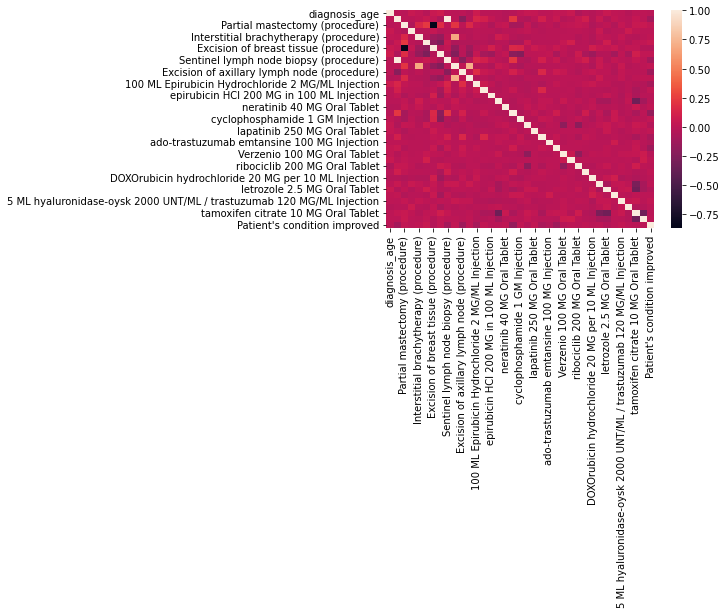

In [290]:
corr = dfnew.corr()
sns.heatmap(corr)